# Directed Acyclic Graphs

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

## I. Discrimination and Collider Bias

In [2]:
obs = 10000 # number of observations

# construct dataframe 
tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size = obs),
    'ability': np.random.normal(size = obs)})

tb['discrimination'] = tb.female
tb['occupation'] = 1 + 2*tb.ability + 0*tb.female - 2*tb.discrimination + np.random.normal(size = obs)
tb['wage'] = 1 - 1*tb.discrimination + tb.occupation + 2*tb.ability + np.random.normal(size = obs)

### Models

In [3]:
# Fit OLS models specified with patsy formulas
# https://patsy.readthedocs.io/en/latest/

biased_unconditional = sm.OLS.from_formula('wage ~ female', data=tb).fit()
biased_conditional = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
unbiased_conditional = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()

In [4]:
models = [biased_unconditional, biased_conditional, unbiased_conditional]
model_names = ['biased unconditional', 'biased conditional', 'unbiased conditional']
summary_col(models, float_format='%0.2f', model_names = model_names)

,biased unconditional,biased conditional,unbiased conditional
Intercept,2.03,0.20,1.00
,(0.06),(0.02),(0.02)
R-squared,0.11,0.91,0.95
R-squared Adj.,0.11,0.91,0.95
ability,,,2.00
,,,(0.02)
female,-2.99,0.61,-0.99
,(0.09),(0.03),(0.03)
occupation,,1.79,0.99
,,(0.01),(0.01)


In [5]:
# Uncomment below to print each model summary individually 
#for name, model in zip(model_names, models):
    #print(name, model.summary())

## II. Sample Selection and Collider Bias

In [6]:
obs = 2500 # number of observations

# construct dataframe
star_is_born = pd.DataFrame() 

star_is_born['beauty'] = np.random.normal(size = obs)
star_is_born['talent'] = np.random.normal(size = obs)

# create the collider variable
star_is_born['score'] = star_is_born.beauty + star_is_born.talent
star_is_born['star'] = star_is_born.score >= star_is_born.score.quantile(.85)

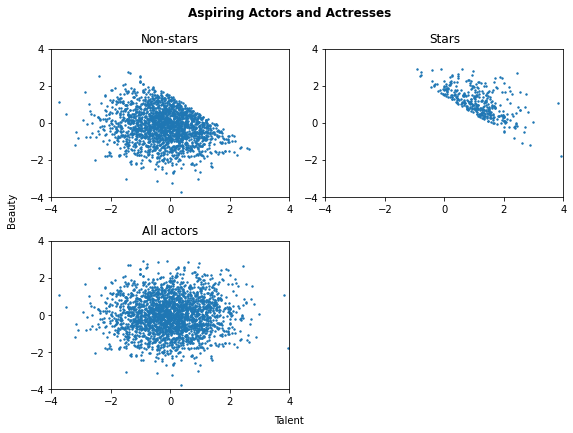

In [7]:
# Make scatter plots

is_star = star_is_born.star == True
stars = star_is_born[is_star]
nonstars = star_is_born[~is_star]

fig = plt.figure(figsize = (8,6))

point_size = 2

# Non-stars
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(nonstars.talent, nonstars.beauty, s = point_size)
ax1.set_title("Non-stars")

# Stars
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(stars.talent, stars.beauty, s = point_size)
ax2.set_title('Stars')

# All actors
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(star_is_born.talent, star_is_born.beauty, s = point_size)
ax3.set_title("All actors")

# Set axes limits
for ax_ in ax1, ax2, ax3:
    ax_.set_xlim([-4,4])
    ax_.set_ylim([-4,4])
    
# Label axes for entire grid
fig.text(0.5, .01, 'Talent', ha='center', va='bottom')
fig.text(.01, 0.51, 'Beauty', ha='left', va='center', rotation='vertical')

# Title entire plot
fig.suptitle("Aspiring Actors and Actresses", fontweight = 'bold')
 
# Adjust layout so x- and y-axis labels are not cut off if saved
fig.tight_layout(rect = (.03,.03,1,1))

In [8]:
# Uncomment to check correlations

#np.corrcoef(star_is_born.talent, star_is_born.beauty)
#np.corrcoef(stars.talent, stars.beauty)
#np.corrcoef(nonstars.talent, nonstars.beauty)